<a href="https://colab.research.google.com/github/lee7py/2021-py-DNN/blob/main/code/7-3%20ch7_RNN_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (1)"
date: 2020-04-22T15:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "Binary Classification"
  - "Classification"
  - "순환 신경망"
  - "Recurrent Neural Network"
  - "RNN"
  - "SimpleRNN"
  - "LSTM"
  - "GRU"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Image Augmentation"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (1)
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)
- [Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)
- [Tensorflow 2.0 Tutorial ch6.1-2 - CNN 이론](https://chloevan.github.io/python/tensorflow2.0/ch6_1_2_cnn_theory/)
- [Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습](https://chloevan.github.io/python/tensorflow2.0/ch6_3_fashion_mnist_with_cnn/)
- [Tensorflow 2.0 Tutorial ch6.4 - 모형의 성능 높이기](https://chloevan.github.io/python/tensorflow2.0/ch6_4_improve_performance/)


## I. 개요

순환 신경망(Recurrent Neural Network; RNN)은 지금까지 살펴본 네트워크와는 입력을 받아들이는 방식과 처리하는 방식에 약간 차이가 있습니다. 순환 신경망은 순서가 있는 데이터를 입력으로 받고, 같은 네트워크를 이용해 변화하는 입력에 대한 출력을 얻어냅니다. 

순서가 있는 데이터는 음악, 자연어, 날씨, 주가 등 시간의 흐름에 따라 변화하고 그 변화가 의미를 갖는 데이터입니다. 

## II. 순환 신경망의 구조

우선 `CNN`과 `RNN`의 딥러닝 구조의 차이점에 대해 이미지[^1]로 확인하면 보다 직관적으로 이해가 될 수 있습니다. 

CNN의 구조는 본 교재를 계속 따라오셨다면 익숙하다시피, 아래와 같은 구조로 되어 있습니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_01_CNN.png)

그러나, RNN의 구조는 아래에서 확인할 수 있는 것처럼, 순환 모양의 화살표가 있다는 것이 차이점입니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_01_RNN.png)

순환 신경망의 특징에 대해 간단하게 요약하면 다음과 같습니다. 
- 입력 X를 받아서, 출력 Y를 반환합니다.
- 순환구조를 가지고 있다; 어떤 레이어의 출력을 다시 입력으로 받는 구조를 말합니다. 
- 순환 신경망은 입력과 출력의 길이에 제한이 없습니다. 
- 순환 신경망은 이미지에 대한 설명을 생성하는 이미지 설명 생성, 문장의 긍정/부정을 판단하는 감성 분석, 하나의 언어를 다른 언어로 번역하는 기계 번역(Machine Translation) 등 다양한 용도로 활용됩니다. 

순환 신경망의 이론에 대한 자세한 설명은 교재 (`p. 174-5`)를 참조하시기를 바랍니다. 

## III. 주요 레이어 정리
순환 신경망의 가장 기초적인 레이어는 `SimpleRNN` 레이어이며, 이 레이어에서 출발한 `LSTM` 레이어 또는 `GRU`레이어가 주로 쓰입니다. 그리고, 자연어 처리를 위해서 꼭 알아둬야 하는 임베딩(`Embedding`)레이어도 같이 알아봅니다. 

### (1) SimpleRNN 레이어
`SimpleRNN`레이어는 가장 간단한 형태의 `RNN`레이업니다. 수식에 대한 설명은 교재(`p. 176`)를 참고합니다. 이 때 주로 사용되는 활성화 함수로는 `tanh`가 사용됩니다. `tanh`는 실수 입력을 받아 -1에서 1사이의 출력 값을 반환하는 활성하 함수이며, 이 활성화 함수 자리에 `ReLU`같은 다른 활성화함수를 쓸 수도 있습니다. 

`SimpleRNN` 레이어는 `tf.keras`에서 한 줄로 간단하게 생성이 가능합니다.

```python
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)
```

- `units`는 `SimpleRNN`의 레이어에 존재하는 뉴런의 수를 의미합니다. `return_sequences`는 출력으로 시퀀스 전체를 출력할지 여부를 나타내는 옵션이며, 여러 개의 `RNN 레이어`를 쌓을 때 쓰입니다. 

간단한 예제를 통해서 학습을 해봅니다. 


[^1]: Different between CNN，RNN（Quote） Retrieved from https://medium.com/@Aj.Cheng/different-between-cnn-rnn-quote-7c224795db58


In [10]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [11]:
X = []
Y = []

for i in range(6):
  # [0, 1, 2, 3], [1, 2, 3, 4]
  lst = list(range(i,i+4))

  # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다. 
  # SimpleRNN에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다. 
  X.append(list(map(lambda c:[c/10], lst)))

  # 정답에 해당하는 4, 5 등의 정수 역시 앞에서처럼 10으로 나눠서 저장합니다. 
  Y.append((i+4)/10)

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(X)
print(Y)
print()

(6, 4, 1)
(6,)
[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]
[0.4 0.5 0.6 0.7 0.8 0.9]



In [3]:
for i in range(len(X)): 
  print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [4]:
  print(X.shape)
  print(Y.shape)
  print(X)
  print(Y)

(6, 4, 1)
(6,)
[[[0. ]
  [0.1]
  [0.2]
  [0.3]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]]]
[0.4 0.5 0.6 0.7 0.8 0.9]


이제 `SimpleRNN` 레이어를 사용한 네트워크를 정의합니다. 모델 구조는 지금까지 계속 봐온 시퀀셜 모델이고, 출력을 위한 `Dense` 레이어가 뒤에 추가되어 있습니다. 

In [5]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    #tf.keras.layers.SimpleRNN(10, input_length=4, input_dim=1),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


여기에서 주목해야 하는 코드는 `input_shape`입니다. 여기에서 `[4,1]`은 각각 `timesteps`, `input_dim`을 나타냅니다. 타입스텝은(timesteps)이란 순환 신경망이 입력에 대해 계산을 반복하는 횟수를 말하고, `input_dim`은 벡터의 크기를 나타냅니다. 

```
[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
```

두번째의 4는 타임스텝, 세번째의 1은 `input_dim`이 됩니다. 그림을 참조하면 훨씬 이해하기 쉽습니다. (교재, p.180)

시퀀스 예측 모델은 4 타임스텝에 걸쳐 입력을 받고, 마지막에 출력값을 다음 레이어로 반환합니다. 우리가 추가한 `Dense`레이어에는 별도의 활성화함수가 없기 때문에 $h_{3}$는 바로 $y_{3}$이 됩니다. 그리고 이 값과 0.4와의 차이가 `mse`, 즉 평균 제곱 오차(`Mean Squared Error`)가 됩니다. 

이제 훈련을 시킵니다. 이 때, `verbose`값을 0으로 놓으면 훈련 과정에서의 출력이 나오지 않습니다. 

In [8]:
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.39136913]
 [0.5137689 ]
 [0.6225732 ]
 [0.7166634 ]
 [0.79661   ]
 [0.8638736 ]]


X가 주어졌을 때 학습된 모델이 시퀀스를 어떻게 예측하는지 확인해보면 얼추 비슷하게 예측하고 있음을 확인할 수 있습니다. 그렇다면 학습과정에서 본 적이 없는 테스트 데이터를 넣으면 어떨까요? `X`의 범위가 0.0~0.9 였으니, 양쪽으로 한 칸씩 더 나간 데이터를 입력합니다. 


In [9]:
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.92014825]]
[[0.25870302]]


문제

In [12]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=6, return_sequences=False, input_shape=[4, 2]),
    tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


1을 예측하기를 원한 데이터의 출력으로는 0.91을 0.3을 예측하기 원한 데이터의 출력으로는 0.22의 값을 반환했습니다. 

실무에서는 `SimpleRNN`보다는 `LSTM` 레이어와 `GRU`레이어를 사용합니다. 

### (2) LSTM 레이어

`SimpleRNN` 레이어에는 한 가지 치명적인 단점이 존재합니다. 입력 데이터가 길어질수록, 즉 데이터의 타임스텝이 길어질수록 학습 능력이 떨어진다는 점입니다. 이를 장기의존성(Long-Term Dependency)문제라고 하며, 입력 데이터와 출력 사이의 길이가 멀어질수록 연관 관계가 적어집니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_02_LongTermDependency.png)

위 그림이 이러한 문제를 적절하게 표현한 것입니다. 입력 데이터가 길어지면 길어질수록 출력값의 연관 관계가 적어지는 것을 볼 수 있습니다. 

이러한 문제점을 해결하기 위해 `LSTM`이 제안 되었습니다.[^2] 셀로 나타낸 SimpleRNN과 LSTM의 계산 흐름을 보면 조금 이해가 될 것입니다. 

- 먼저 SimpleRNN의 그림은 아래와 같습니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_02_SimpleRNN.png)

여기에서는 타임스텝의 방향으로 $h_{t}$만 전달되고 있음을 확인할 수 있습니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_02_LSTM.png)

그런데, 여기에서는 셀 상테인 $c_{t}$가 평생선을 그리며 함께 전달되고 있습니다. 이처럼 타임스텝을 가로지르며 `LSTM` 셀 상태가 보존되기 때문에 장기의존성 문제를 해결할 수 있다는 것이 `LSTM`의 핵심 아이디어입니다. 

교재 184페이지를 보면 위 셀에 대한 수식이 존재합니다만, 수식에 대한 구체적인 이해가 자료가 필요하다면 크리스토퍼 올라(`Christopher Olah`)의 블로그 글을 참고합니다.[^3]

`LSTM`의 학습 능력을 확인하기 위한 예제는 `LSTM`을 처음 제안한 논문에 나온 실험 여섯개 중 다섯 번째인 곱셈 문제(`Multiplication Problem`)입니다. 이 문제는 말 그대로 실수에 대해 곱셈을 하는 문제인데, 고려해야 할 실수의 범위가 100개이고 그 중에서 마킹된 두개의 숫자만 곱해야 한다는 특이한 문제입니다. 

[^2]: 1997년 셉 호흐라이터(Sepp Hochreiter) 유르겐 슈미트후버(Jurgen Schmidhuber)에 의해 제안됨, (S. Hochreiter and J. Schmidhuber. Long short-term memory. Neural Computation, 1997. https://www.bioinf.jku.at/publications/older/2604.pdf 

[^3]: Olah, Christopher. “Understanding LSTM Networks.” Understanding LSTM Networks -- Colah's Blog, colah.github.io/posts/2015-08-Understanding-LSTMs/



In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [2]:
X = []
Y = []
for i in range(3000): 
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다. 
  lst = np.random.rand(100)

  # 마킹할 숫자 2개의 인덱스를 뽑습니다. 
  idx = np.random.choice(100, 2, replace=False)

  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다. 
  zeros=np.zeros(100)
  zeros[idx]=1
  
  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다. 
  X.append(np.array(list(zip(zeros, lst))))
  # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다. 
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.82460292]
 [0.         0.28347129]
 [0.         0.49241977]
 [0.         0.72153292]
 [0.         0.48083461]
 [0.         0.83429886]
 [1.         0.94081183]
 [0.         0.4513793 ]
 [0.         0.50638491]
 [0.         0.09614864]
 [0.         0.59529907]
 [0.         0.88268554]
 [0.         0.69571169]
 [0.         0.80730224]
 [0.         0.61231659]
 [0.         0.32058495]
 [0.         0.90422398]
 [0.         0.75802085]
 [0.         0.69330547]
 [0.         0.45260086]
 [0.         0.84193957]
 [0.         0.75551941]
 [0.         0.70327102]
 [0.         0.64814797]
 [0.         0.25072947]
 [0.         0.0479494 ]
 [0.         0.89582523]
 [0.         0.85455796]
 [0.         0.13373338]
 [0.         0.51017449]
 [0.         0.33156932]
 [0.         0.398899  ]
 [0.         0.77698567]
 [0.         0.37742786]
 [0.         0.47731346]
 [0.         0.77737904]
 [0.         0.63259562]
 [0.         0.01786874]
 [0.         0.21208832]
 [0.         0.58181901]


입력된 값이 길지만, 1은 두번만 들어가 있기 때문에, 1이 찍인 원소를 찾습니다. `[1.    0.08361932]`과 `[1.         0.66439549]`이 확인이 됩니다. 

`0.08361932`와 `0.66439549`를 곱하면 `0.055556298045436`값이 나옵니다. `SimpleRNN` 레이어를 이용한 곱셈 문제 모델을 정의합니다. 

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]), 
  tf.keras.layers.SimpleRNN(units=30), 
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


`RNN` 레이어를 겹치기 위해 첫 번째 `SimpleRNN`레이어에서 `return_sequences=True`로 설정된 것을 확인할 수 있습니다. `return_sequences`는 레이어의 출력을 다음 레이어로 그대로 넘겨주게 됩니다. 

겹치는 레이어의 구조에 대한 이론 설명은 교재 `188페이지`를 참조하시기를 바랍니다. `RNN`은 `CNN`보다 학습 시간이 오래 걸리는 편이기 때문에 반드시 가속기를 `GPU`로 바꿔줍니다. 

In [4]:
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 저장합니다. 
history=model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 10s 107ms/step - loss: 0.0953 - val_loss: 0.0467
Epoch 2/100
64/64 [==============================] - 7s 104ms/step - loss: 0.0480 - val_loss: 0.0474
Epoch 3/100
64/64 [==============================] - 7s 105ms/step - loss: 0.0477 - val_loss: 0.0448
Epoch 4/100
64/64 [==============================] - 7s 102ms/step - loss: 0.0481 - val_loss: 0.0447
Epoch 5/100
64/64 [==============================] - 7s 104ms/step - loss: 0.0473 - val_loss: 0.0453
Epoch 6/100
64/64 [==============================] - 7s 105ms/step - loss: 0.0471 - val_loss: 0.0442
Epoch 7/100
64/64 [==============================] - 7s 102ms/step - loss: 0.0479 - val_loss: 0.0492
Epoch 8/100
64/64 [==============================] - 7s 103ms/step - loss: 0.0475 - val_loss: 0.0441
Epoch 9/100
64/64 [==============================] - 7s 104ms/step - loss: 0.0477 - val_loss: 0.0441
Epoch 10/100
64/64 [==============================] - 7s 105ms/step - loss: 0.0474 - val_l

훈련 데이터의 손실(`loss`)과 검증 데이터의 손실(`var_loss`)는 감소하지 않고 오히려 증가하는 것 같습니다. 경향을 직관적으로 파악하기 위해 `history` 변수에 저장된 값으로 그래프를 그려봅니다. 

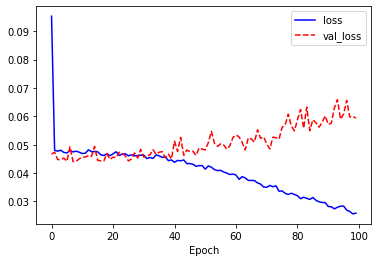

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

학습 결과는 전형적인 과적합 그래프를 보여줍니다. 테스트 데이터에 대한 예측은 어떨까요? 논문에서는 오차가 0.04 이상일 때 오답으로 처리합니다. 

In [6]:
model.evaluate(X[2560:], Y[2560:])
prediction=model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다. 
for i in range(5): 
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.04 이상이면 오답입니다. 
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail +=1

print('correctness:', (440-fail)/440*100, '%')

14/14 [==============================] - 0s 15ms/step - loss: 0.0686
0.07452410023946204 	 0.30821636 	diff: 0.23369226295214257
0.5442782526262651 	 0.30749625 	diff: 0.23678200295051433
0.6490257170556615 	 0.32956606 	diff: 0.31945965555892686
0.21367198378502533 	 0.59582114 	diff: 0.38214915841162994
0.6152284992315684 	 0.3234848 	diff: 0.2917436910250102
correctness: 12.272727272727273 %


먼저 전체에 대한 평가는 `0.0667`의 `loss`가 나왔습니다. 위에서 본 100번째의 에포크의 `val_loss`인 `0.0664`보다도 높은 값으로, 네트워크가 학습 과정에서 한번도 못 본 테스트 데이터에 대해서는 잘 예측하지 못합니다. 5개의 테스트 데이터에 대한 샘플은 오차가 `0.01`에서 `0.18`까지 다양하게 나타나며, 가장 중요한 정확도는 `12.72`로 확인 됩니다. 

그렇다면 `LSTM`레이어는 어떨까요? 이 문제를 풀기 위해 시퀀셜 모델을 정의합니다.


In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]), 
  tf.keras.layers.LSTM(units=30), 
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


차이점은 `SimpleRNN`을 `LSTM`으로 바꾼 것 뿐입니다. 네트워크의 학습코드도 동일합니다. 

Epoch 1/100
64/64 [==============================] - 7s 19ms/step - loss: 0.0486 - val_loss: 0.0433
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0471 - val_loss: 0.0431
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0469 - val_loss: 0.0430
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0470 - val_loss: 0.0433
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0469 - val_loss: 0.0430
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0471 - val_loss: 0.0430
Epoch 7/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.0433
Epoch 8/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.0435
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0467 - val_loss: 0.0436
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0465 - val_loss: 0.0429
Epoch 11

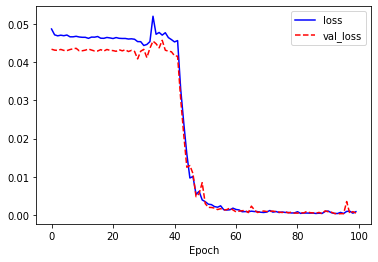

In [8]:
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 저장합니다. 
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

`loss`와 `val_loss`는 40에포크를 넘어가면서 매우 가파르게 줄어들어 0에 가까워집니다. `val_loss`는 변동폭이 `loss`보다 크지만 전체적으로는 계속 감소하는 경향을 보입니다. 학습이 매우 잘 된 것으로 보입니다.

이번에는 실제로 테스트 데이터에 얼마나 정확하게 값을 예측하는지 확인해봅니다. 

In [9]:
model.evaluate(X[2560:], Y[2560:])
prediction=model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다. 
for i in range(5): 
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.04 이상이면 오답입니다. 
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail +=1

print('correctness:', (440-fail)/440*100, '%')

14/14 [==============================] - 1s 7ms/step - loss: 7.3699e-04
0.07452410023946204 	 0.07839883 	diff: 0.003874730949216698
0.5442782526262651 	 0.5354334 	diff: 0.008844841028059491
0.6490257170556615 	 0.6279767 	diff: 0.021049001490933694
0.21367198378502533 	 0.2269955 	diff: 0.013323514156945493
0.6152284992315684 	 0.6188294 	diff: 0.00360092991805927
correctness: 90.68181818181819 %


테스트 데이터에 대한 `loss`는 0에 가까운 값이 나오고, 다섯 개의 샘플에 대한 오차도 0.04를 넘는 값이 없습니다. 또한 정확도 역시, 95.9%로 거의 96%에 가까운 것을 확인할 수 있습니다. 

곱셈문제를 푸는데 있어서 `LSTM`이 보다 적합하다는 것을 알 수 있습니다. 

다음 포스트에서는 `GRU`레이어와 `임베딩`레이어에 대해 학습하도록 합니다. 

## IV. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch7_1_2_RNN_theory(1).ipynb) 

## VI. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=2, input_shape=[4,1], return_sequences=False),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=3, input_shape=[4,1], return_sequences=True),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 4, 3)              15        
_________________________________________________________________
dense_3 (Dense)              (None, 4, 1)              4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, input_shape=[4,3], return_sequences=False),
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_15 (SimpleRNN)    (None, 10)                140       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]), 
  tf.keras.layers.GRU(units=30), 
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
64/64 [==============================] - 3s 18ms/step - loss: 0.0497 - val_loss: 0.0456
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0473 - val_loss: 0.0438
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0468 - val_loss: 0.0432
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0472 - val_loss: 0.0430
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0467 - val_loss: 0.0429
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0469 - val_loss: 0.0429
Epoch 7/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0467 - val_loss: 0.0427
Epoch 8/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0464 - val_loss: 0.0427
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.0427
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0464 - val_loss: 0.0431
Epoch 11

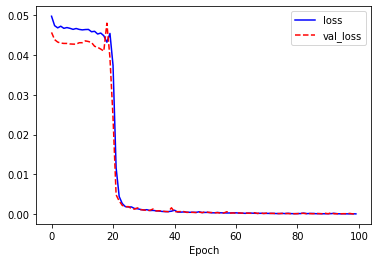

In [13]:
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 저장합니다. 
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
model.evaluate(X[2560:], Y[2560:])
prediction=model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다. 
for i in range(5): 
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.04 이상이면 오답입니다. 
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail +=1

print('correctness:', (440-fail)/440*100, '%')

14/14 [==============================] - 1s 7ms/step - loss: 1.8656e-04
0.07452410023946204 	 0.07412917 	diff: 0.0003949285699788585
0.5442782526262651 	 0.54292804 	diff: 0.0013502125986466496
0.6490257170556615 	 0.6633603 	diff: 0.014334580624239646
0.21367198378502533 	 0.21885759 	diff: 0.005185602598794248
0.6152284992315684 	 0.6209425 	diff: 0.005713974179991643
correctness: 99.0909090909091 %
